# Анализ продаж компьютерных игр

#### Цель исследования

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

#### Описание данных


- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

#####  Считаем CSV-файлы с данными

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')   

#####  Выведим первые строки набора данных

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### Выведем общую информацию о датафрейме

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

##### Вывод

Загрузили данные о продажах виодеоигр `data`. 

- Количество строк в загруженных данных - 16 715.
- Необходимо привести названия столбцов к нижнему регистру.
- Присутствуют пропуски данных в количестве:
    - `Name` (название игры) - 2;
    - `Year_of_Release` (год выпуска) - 269;
    - `Genre` (жанр игры) - 2;
    - `Critic_Score ` (оценка критиков) - 8578;
    - `User_Score` (оценка пользователей) - 6701;
    - `Rating` (рейтинг от организации ESRB) - 6766.

Типы данных не соответствующие хранящимся в них значениям:
- `Year_of_Release` - хранит год выпуска. Необходимо поменять `float64` на `int32`.
- `User_Score ` - хранит оценку пользователей. Необходимо поменять `object` на `float32`.

#### Шаг 2. Предобработка данных

##### Переименование столбцов

In [7]:
# Приведем названия столбцов к нижнему регистру.
data.columns = data.columns.str.lower()

In [8]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Названия столбцов приведены к ниженему регистру

##### Заполнение пропущенных значений

###### Обработаем пропуски в названии игр, столбец `name`

In [9]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две строки с 1993 годом релиза игр. Удалим эти строки

In [10]:
data.shape

(16715, 11)

In [11]:
data = data.dropna(subset=['name'])

In [12]:
data['name'].isna().sum()

0

In [13]:
data.shape

(16713, 11)

Устранили пропуски данных в названии игр, удалив две строки с играми 1993 года выпуска.

###### Обработаем пропуски в годе выпуска `уear_of_release`

In [14]:
data = data.dropna(subset=['year_of_release'])

In [15]:
data['year_of_release'].isna().sum()

0

In [16]:
data.shape

(16444, 11)

Исключили 269 строк с пропусками в годах выпуска.

###### Обработаем пропуски в оценке критков `critic_score`

In [17]:
# процент пропусков в оценке критиков
(data['critic_score'].isna().sum() / len(data['name'])) * 100

51.453417659936754

In [18]:
data.query('critic_score.isna()').groupby('year_of_release')['year_of_release'].count()

year_of_release
1980.0      9
1981.0     46
1982.0     36
1983.0     17
1984.0     14
1985.0     13
1986.0     21
1987.0     16
1988.0     14
1989.0     17
1990.0     16
1991.0     41
1992.0     42
1993.0     60
1994.0    120
1995.0    219
1996.0    255
1997.0    272
1998.0    351
1999.0    299
2000.0    207
2001.0    156
2002.0    202
2003.0    190
2004.0    201
2005.0    284
2006.0    386
2007.0    505
2008.0    712
2009.0    775
2010.0    755
2011.0    636
2012.0    332
2013.0    271
2014.0    320
2015.0    381
2016.0    270
Name: year_of_release, dtype: int64

In [19]:
data.query('critic_score.isna()').groupby('platform')['platform'].count()

platform
2600     116
3DO        3
3DS      346
DC        38
DS      1413
GB        97
GBA      381
GC       105
GEN       27
GG         1
N64      316
NES       98
NG        12
PC       258
PCFX       1
PS       994
PS2      852
PS3      502
PS4      140
PSP      737
PSV      310
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii      718
WiiU      57
X360     338
XB        97
XOne      78
Name: platform, dtype: int64

Пропуски в оценке критков составляют 51,38% и пропуски есть за разные периоды. Оставим пропущенные значения, так как пропущенно очень большое количество значений и за разные периоды, а также необязательно, что игра получившая хорошие оценки на одной из платформ, получит их на другой из за особенностей как самой платформы, так и адаптации.

Предположим, что пропуски в данных возникли из-за того, что данные собирались из различных источников и возможно в автоматическом режиме не получилось корректно их объеденить.

###### Обработаем пропуски в оценке пользователей `user_score`

In [20]:
# процент пропусков в оценке критиков
(data['user_score'].isna().sum() / len(data['name'])) * 100

40.166626125030405

In [21]:
data.query('user_score.isna()').groupby('year_of_release')['year_of_release'].count()

year_of_release
1980.0      9
1981.0     46
1982.0     36
1983.0     17
1984.0     14
1985.0     13
1986.0     21
1987.0     16
1988.0     14
1989.0     17
1990.0     16
1991.0     41
1992.0     42
1993.0     60
1994.0    120
1995.0    219
1996.0    255
1997.0    270
1998.0    348
1999.0    299
2000.0    200
2001.0    143
2002.0    173
2003.0    164
2004.0    166
2005.0    235
2006.0    330
2007.0    376
2008.0    440
2009.0    407
2010.0    457
2011.0    418
2012.0    290
2013.0    225
2014.0    231
2015.0    271
2016.0    206
Name: year_of_release, dtype: int64

In [22]:
data.query('user_score.isna()').groupby('platform')['platform'].count()

platform
2600    116
3DO       3
3DS     287
DC       38
DS      865
GB       97
GBA     302
GC       85
GEN      27
GG        1
N64     316
NES      98
NG       12
PC      153
PCFX      1
PS      987
PS2     671
PS3     358
PS4     129
PSP     657
PSV     280
SAT     173
SCD       6
SNES    239
TG16      2
WS        6
Wii     310
WiiU     42
X360    204
XB       86
XOne     54
Name: platform, dtype: int64

Пропуски в оценке пользователей составляют 40,11% и пропуски есть за разные периоды на разных платформах. Оставим пропущенные значения, как есть.

###### Обработаем пропуски в рейтинге от организации ESRB `rating`

In [23]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [24]:
(data['rating'].isna().sum() / len(data['name'])) * 100

40.59839455120409

In [25]:
data.query('rating.isna()').groupby('year_of_release')['year_of_release'].count()

year_of_release
1980.0      9
1981.0     46
1982.0     36
1983.0     17
1984.0     14
1985.0     13
1986.0     21
1987.0     16
1988.0     14
1989.0     17
1990.0     16
1991.0     41
1992.0     41
1993.0     60
1994.0    120
1995.0    219
1996.0    256
1997.0    270
1998.0    347
1999.0    296
2000.0    202
2001.0    143
2002.0    174
2003.0    162
2004.0    164
2005.0    233
2006.0    328
2007.0    376
2008.0    446
2009.0    415
2010.0    456
2011.0    433
2012.0    298
2013.0    228
2014.0    236
2015.0    291
2016.0    222
Name: year_of_release, dtype: int64

In [26]:
data.query('rating.isna()').groupby('platform')['platform'].count()

platform
2600    116
3DO       3
3DS     289
DC       38
DS      866
GB       97
GBA     297
GC       85
GEN      27
GG        1
N64     316
NES      98
NG       12
PC      200
PCFX      1
PS      986
PS2     671
PS3     371
PS4     137
PSP     657
PSV     279
SAT     173
SCD       6
SNES    239
TG16      2
WS        6
Wii     309
WiiU     42
X360    202
XB       89
XOne     61
Name: platform, dtype: int64

In [27]:
data.query('rating.isna()').groupby('genre')['genre'].count()

genre
Action          1161
Adventure        853
Fighting         405
Misc             859
Platform         317
Puzzle           233
Racing           370
Role-Playing     711
Shooter          300
Simulation       298
Sports           828
Strategy         341
Name: genre, dtype: int64

Заполним пропуски, присвоив им значение `unknown`.

In [28]:
data['rating'].fillna('unknown', inplace=True)

In [29]:
data['rating'].isna().sum()

0

In [30]:
data.query('rating == "unknown"')['rating'].count()

6676

In [31]:
data.shape

(16444, 11)

In [32]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Пропуске в рейтинге составляют 40,56%. Пропуски выделили в отдельную группу, присвоив им значение 'unknown'.

##### Преобразование типов данных

**Преобразуем тип данных в `year_of_release` (год выпуска) на int32**

In [33]:
data['year_of_release'] = data['year_of_release'].astype('int32')

In [34]:
data['year_of_release'].sample(10)

2113     2005
1021     2014
7490     2009
15938    2014
690      2012
5577     2009
3972     2002
13877    1997
14531    2005
16148    2005
Name: year_of_release, dtype: int32

**Преобразуем тип данных в `user_score` (оценка пользователей) на float32**

При преобразовании возникла ошибка `ValueError: could not convert string to float: 'tbd'` В данных есть строковое значение 'tbd', что означает 'подлежит уточнению'. Фактически, это NaN. Поэтому изменим это значение и после этого преобразуем тип данных.

In [35]:
data.loc[data['user_score'] == 'tbd', 'user_score'].count()

2376

In [36]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

data['user_score'] = data['user_score'].astype('float32')

In [37]:
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float32
rating              object
dtype: object

##### Подсчет суммарных продаж во всех регионах

In [38]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [39]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [40]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


##### Обработка дубликатов

**Полные дубликаты**

In [41]:
data.duplicated().sum()

0

**Неявные дубликаты** (совпадающие по названию, платформе и году релиза одновременно).

In [42]:
data[['name', 'platform', 'year_of_release']].duplicated().sum()

1

In [43]:
data.drop_duplicates(['name', 'platform', 'year_of_release'], inplace=True)

In [44]:
data[['name', 'platform', 'year_of_release']].duplicated().sum()

0

Удалили 1 строку с неявными дубликатами по названию, платформе и году релиза одновременно.

##### Вывод

Переименованили столбцы:
- Названия столбцов приведены к ниженему регистру.

Заполнили пропущенные значения:
- Устранили пропуски данных в названии игр, удалив две строки с играми 1993 года выпуска.
- Исключили 269 строк с пропусками в годах выпуска.
- Пропуски в оценке критков составляют 51,38% и пропуски есть за разные периоды. Оставили пропущенные значения, так как пропущенно очень большое количество значений и за разные периоды, а также необязательно, что игра получившая хорошие оценки на одной из платформ, получит их на другой из за особенностей как самой платформы, так и адаптации.
- Пропуски в оценке пользователей составляют 40,11% и пропуски есть за разные периоды на разных платформах. Оставили пропущенные значения.
- Пропуске в рейтинге составляют 40,56%. Пропуски выделили в отдельную группу, присвоив им значение 'unknown'.

Преобразовали типы данных:
- Преобразовали тип данных в year_of_release (год выпуска) на int32.
- Преобразовали тип данных в user_score (оценка пользователей) на float32. При этом 2379 строк содержали не числовое значение 'tbd', что означает 'подлежит уточнению'. Изменили значение на NaN и после этого преобразовали тип данных.

Обработка дубликатов:
- Удалили 1 строку с неявными дубликатами по названию, платформе и году релиза одновременно.

Подсчетали суммарные продажи игр во всех регионах и записали значения в `total_sales`

#### Шаг 2. Исследовательский анализ данных

##### Количество игр выпущенных в разные годы

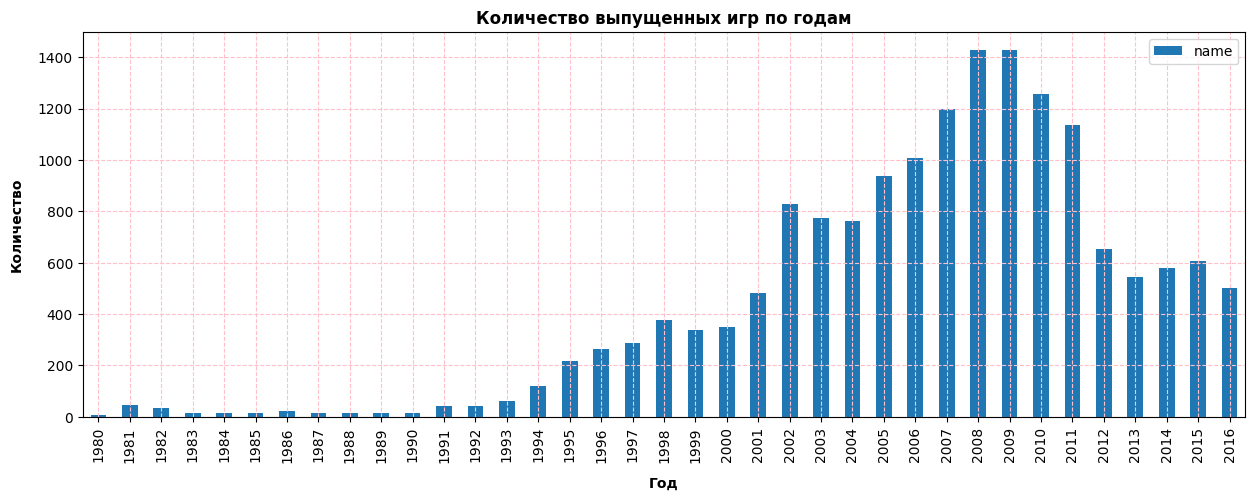

In [45]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', 
                                                                               figsize=(15, 5))
plt.grid(linestyle='--', color='pink')
plt.title('Количество выпущенных игр по годам', fontweight='bold')
plt.xlabel('Год', labelpad=10, fontweight='bold')
plt.ylabel('Количество', labelpad=10, fontweight='bold')
plt.show()

In [46]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').describe()

,name
count,37.000000
mean,444.405405
std,451.591535
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


Компьютерные игры начали выпускаться с 1980 года (9 шт) и до 1993 г. рост количества выпускаемых игр практически отсутствовал.
С 1993 года количество выпускаемых игр начинает расти и в 2002 наблюдается резкий скачок - более 800 выпускаемых игр в год.
Максимум выпущенных игр был в 2008 году и сооставил 1432 игры за год. В 2012 наблюдаем резкий спад до 653 игры по сравнению с 2011, в котором было выпущено 1138 игр. С 2012 по 2015 количество выпускаемых игр значительно не менялось. За 2016 год данные возможно неполные, поэтому количество игр чуть меньше по сравнению с периодом за 2012 по 2015 гг. Для нас важным является период 2012 - 2016.

##### Количество продаж по платформам

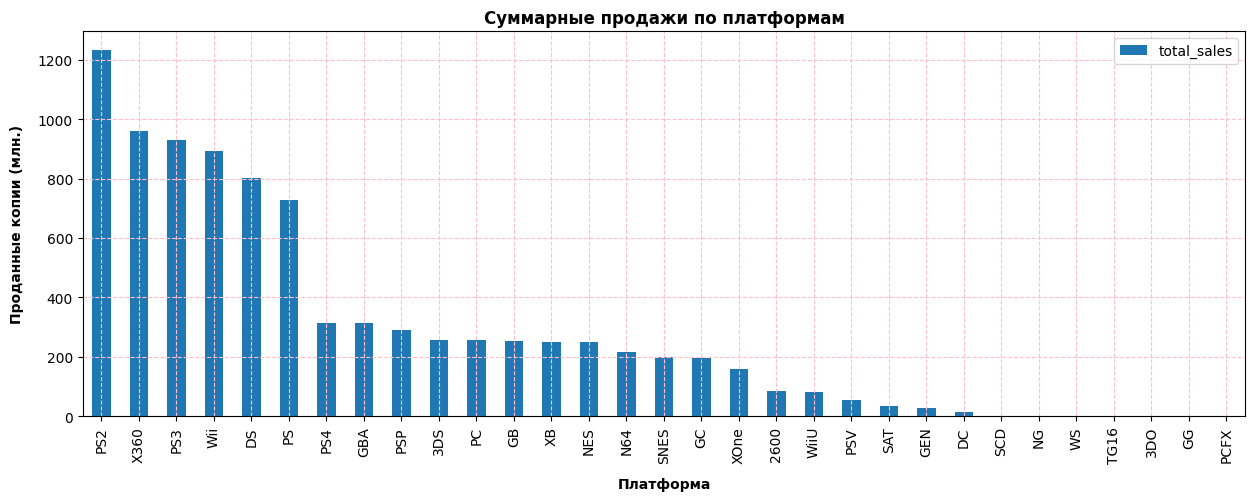

In [47]:
data.pivot_table(index='platform', 
                 values='total_sales', 
                 aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar', figsize=(15, 5))
plt.grid(linestyle='--', color='pink')
plt.title('Суммарные продажи по платформам', fontweight='bold')
plt.xlabel('Платформа', labelpad=10, fontweight='bold')
plt.ylabel('Проданные копии (млн.)', labelpad=10, fontweight='bold')
plt.show()

Выберим платформы с наибольшими суммарными продажами и постройм распределение по годам

In [48]:
top_sales_filter = data.pivot_table(index='platform', 
                             values='total_sales', 
                             aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
top_sales_filter

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58


In [49]:
total_sales = data.pivot_table(index='platform', 
                               columns='year_of_release', 
                               values='total_sales', 
                               aggfunc='sum')

total_sales = total_sales.query('index in @top_sales_filter.index')

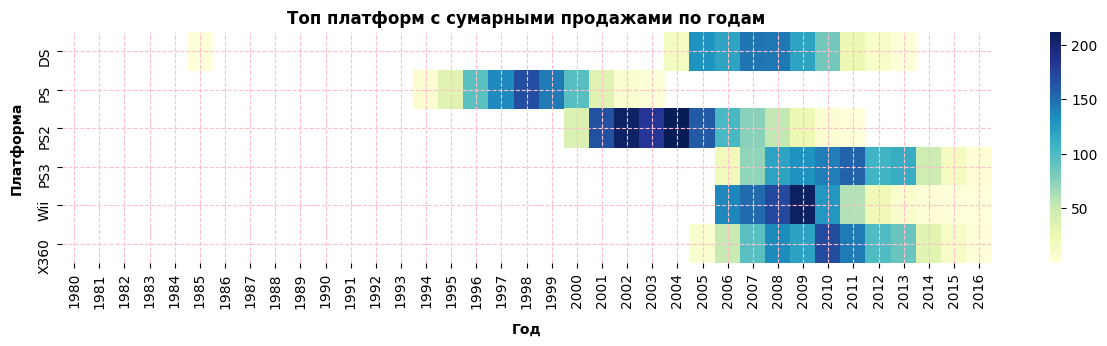

In [50]:
plt.figure(figsize=(15, 3))
sns.heatmap(total_sales, cmap='YlGnBu')
plt.grid(linestyle='--', color='pink')
plt.title('Топ платформ с сумарными продажами по годам', fontweight='bold')
plt.xlabel('Год', labelpad=10, fontweight='bold')
plt.ylabel('Платформа', labelpad=10, fontweight='bold')
plt.show()

Выбивается значение 1985 года для платформы DS

In [51]:
data.loc[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


Предположу, что это переиздание старой игры для платформы DS. Но точно не известо, поэтому исключим эту строку.

In [52]:
data = data.loc[(data['platform'] != 'DS') & (data['year_of_release'] != 1985)]

In [53]:
top_sales_filter = data.pivot_table(index='platform', 
                             values='total_sales', 
                             aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)

In [54]:
for i in top_sales_filter.index:
    i_describe = data.query('platform == @i')['year_of_release'].describe()
    data_start = int(i_describe['min'])
    data_finish = int(i_describe['max'])
    total_years = data_finish - data_start + 1
    display(f'Продажи игр для платформы {i} начались с {data_start}г. и продолжались {total_years} лет')

'Продажи игр для платформы PS2 начались с 2000г. и продолжались 12 лет'

'Продажи игр для платформы X360 начались с 2005г. и продолжались 12 лет'

'Продажи игр для платформы PS3 начались с 2006г. и продолжались 11 лет'

'Продажи игр для платформы Wii начались с 2006г. и продолжались 11 лет'

'Продажи игр для платформы PS начались с 1994г. и продолжались 10 лет'

'Продажи игр для платформы PS4 начались с 2013г. и продолжались 4 лет'

Срок жизни платформы составляет 10 - 12 лет и период топ продаж игр для нее - 5 лет.

##### Исследование актуального периода

Возьмем данные за 2012 - 2016 года. При анализе надо учитывать, что данные за 2016 год не полные

In [55]:
actual_data = data.query('year_of_release >= 2012')

In [56]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [57]:
actual_data['year_of_release'].describe()

count    2854.000000
mean     2013.935529
std         1.407772
min      2012.000000
25%      2013.000000
50%      2014.000000
75%      2015.000000
max      2016.000000
Name: year_of_release, dtype: float64

###### Лидеры по продажам

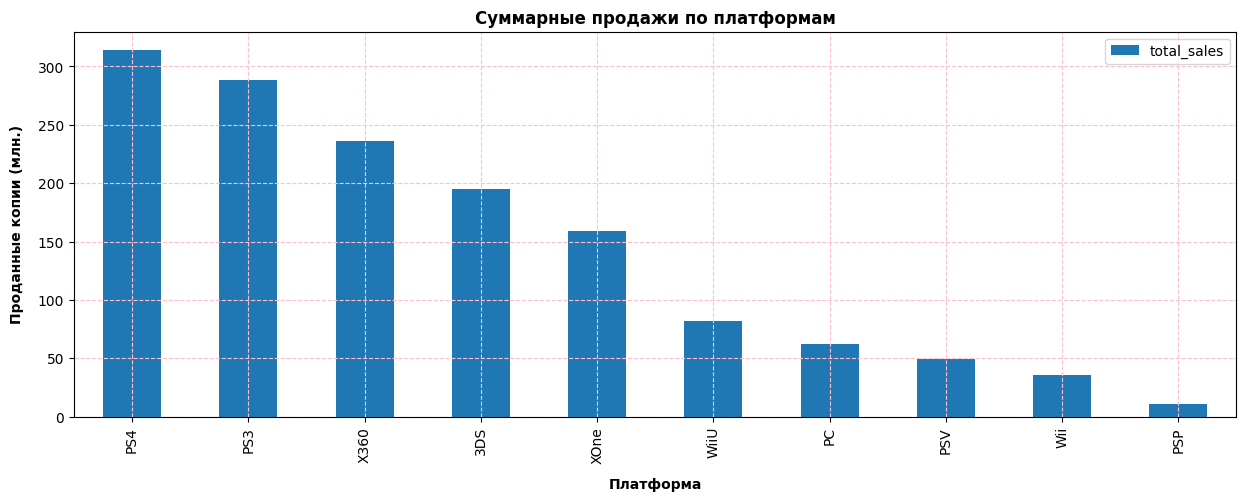

In [58]:
actual_data.pivot_table(index='platform', 
                 values='total_sales', 
                 aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar', figsize=(15, 5))
plt.grid(linestyle='--', color='pink')
plt.title('Суммарные продажи по платформам', fontweight='bold')
plt.xlabel('Платформа', labelpad=10, fontweight='bold')
plt.ylabel('Проданные копии (млн.)', labelpad=10, fontweight='bold')
plt.show()

In [59]:
actual_data.groupby('year_of_release')['total_sales'].sum()

year_of_release
2012    344.82
2013    359.70
2014    331.53
2015    267.98
2016    129.94
Name: total_sales, dtype: float64

In [60]:
actual_total_sales = actual_data.pivot_table(index='year_of_release', 
                                             columns='platform', 
                                             values='total_sales', 
                                             aggfunc='sum')
actual_total_sales

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2012,51.36,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [61]:
actual_total_sales.index

Int64Index([2012, 2013, 2014, 2015, 2016], dtype='int64', name='year_of_release')

In [62]:
# Фильтр чтобы не выводить все платформы на графике
filter_actual_data_top = actual_data.pivot_table(index='platform', 
                                                 values='total_sales', 
                                                 aggfunc='sum').sort_values(by='total_sales', ascending=False).head(7)
filter_actual_data_top.index

Index(['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC'], dtype='object', name='platform')

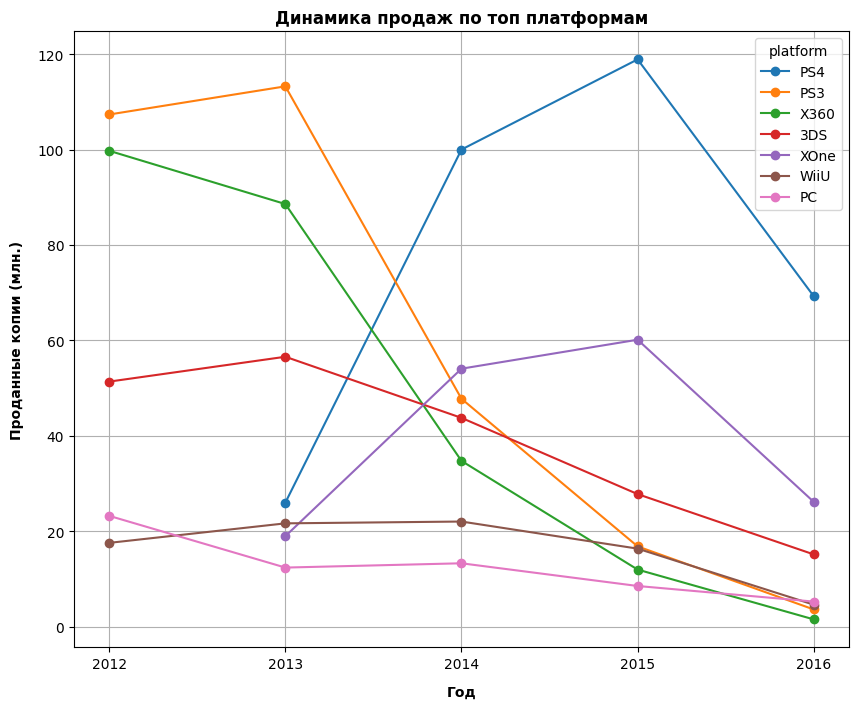

In [63]:
actual_total_sales[filter_actual_data_top.index].plot(kind='line', 
                                                      style='o-',
                                                      figsize=(10, 8),
                                                      grid=True,
                                                      legend=True)
plt.title('Динамика продаж по топ платформам', fontweight='bold')
plt.xlabel('Год', fontweight='bold', labelpad=10)
plt.ylabel('Проданные копии (млн.)', fontweight='bold', labelpad=10)
plt.xticks(np.arange(min(actual_total_sales.index), max(actual_total_sales.index)+1))
plt.show()

Перспективными платформами являются PS4 и XOne.

##### Глобальные продажи игр в разбивке по платформам

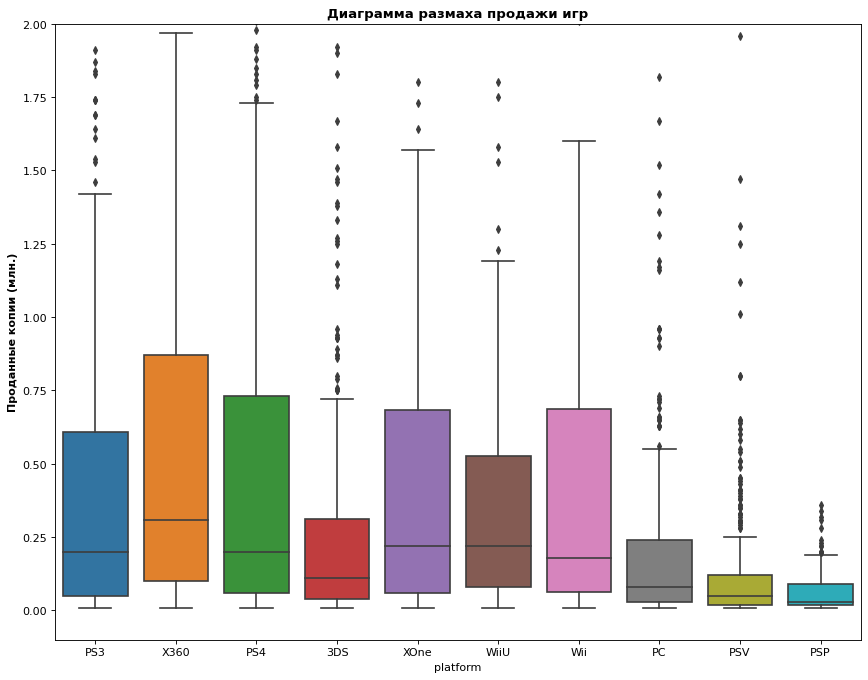

In [64]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='platform', y='total_sales', data=actual_data)

plt.title('Диаграмма размаха продажи игр', fontsize=12, fontweight='bold')
plt.ylim(-0.1, 2,5)
plt.ylabel('Проданные копии (млн.)', fontweight='bold')
plt.show()


Присутствует много выбросов связанных с продажей популярных игр. Если смотреть на медианные значения, то выделяются плантформы: PS3, X360, PS4, XOne, WiiU

##### Влияние отзывов на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Возьмем для анализа платформы PS3, X360, PS4

In [65]:
filter_platform = ['PS3', 'X360', 'PS4']

###### Как влияют на продажи отзывы критиков

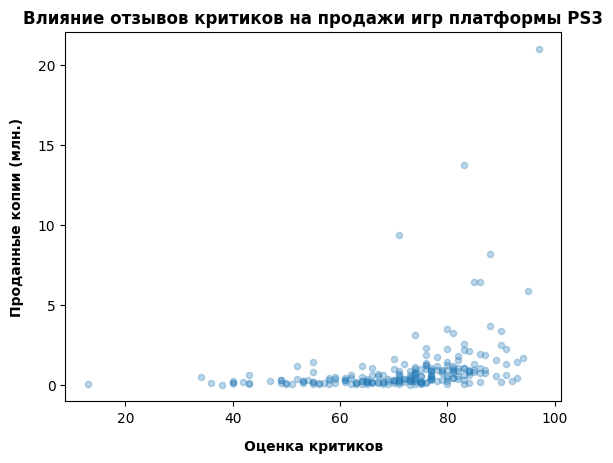

'коэффициент Пирсона = 0.33'

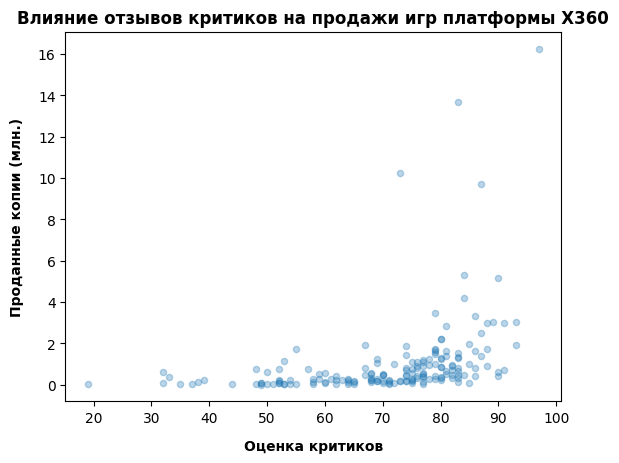

'коэффициент Пирсона = 0.36'

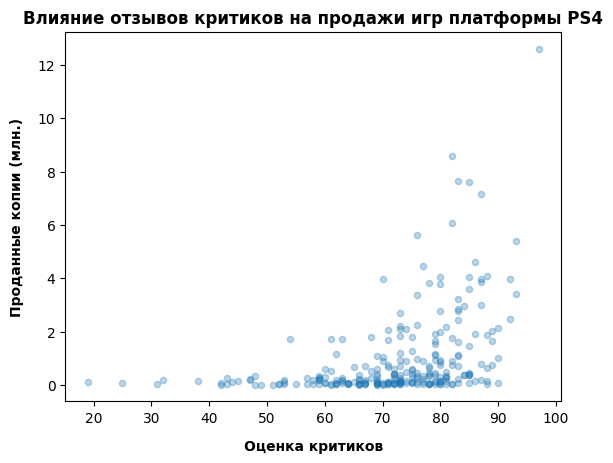

'коэффициент Пирсона = 0.41'

In [66]:
for i in filter_platform:
    actual_data.query('platform == @i').plot(x='critic_score', y='total_sales',  kind='scatter', alpha=0.3)
    
    
    plt.title(f'Влияние отзывов критиков на продажи игр платформы {i}', fontweight='bold')
    plt.xlabel('Оценка критиков', fontweight='bold', labelpad=10)
    plt.ylabel('Проданные копии (млн.)', fontweight='bold', labelpad=10)
    plt.show()
    
    сor = actual_data.query('platform == @i')['critic_score'].corr(actual_data.query('platform == @i')['total_sales'])
    display(f'коэффициент Пирсона = {round(сor, 2)}')

Присутствует слабая прямая связь отзывов критиков на продажи.

###### Как влияют на продажи отзывы пользователей

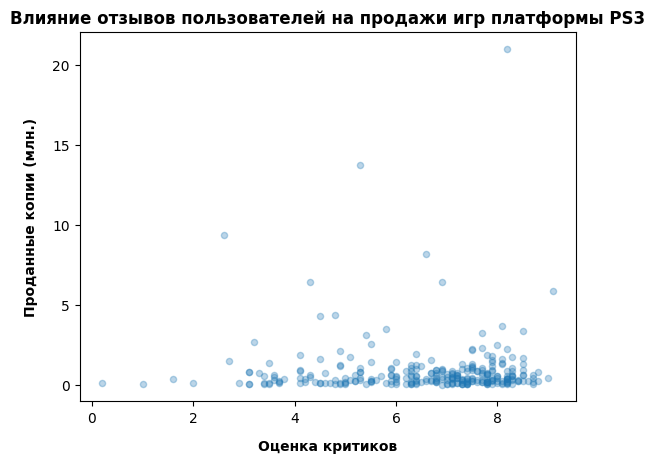

'коэффициент Пирсона = -0.01'

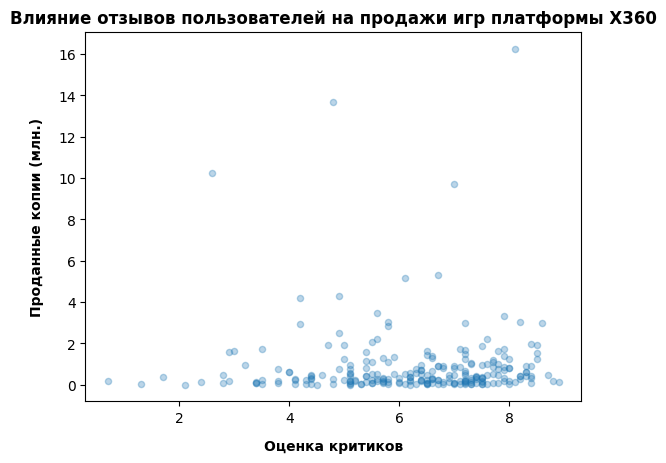

'коэффициент Пирсона = 0.01'

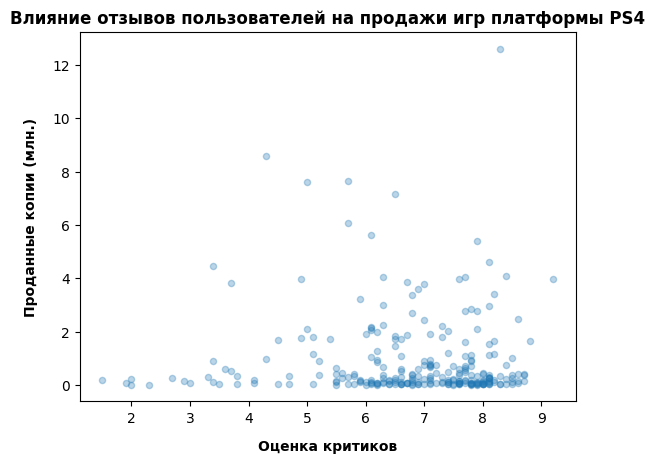

'коэффициент Пирсона = -0.03'

In [67]:
for i in filter_platform:
    actual_data.query('platform == @i').plot(x='user_score', y='total_sales',  kind='scatter', alpha=0.3)
    
    
    plt.title(f'Влияние отзывов пользователей на продажи игр платформы {i}', fontweight='bold')
    plt.xlabel('Оценка критиков', fontweight='bold', labelpad=10)
    plt.ylabel('Проданные копии (млн.)', fontweight='bold', labelpad=10)
    plt.show()
    
    сor = actual_data.query('platform == @i')['user_score'].corr(actual_data.query('platform == @i')['total_sales'])
    display(f'коэффициент Пирсона = {round(сor, 2)}')

Отзывы пользователей не сказываются на продажах.

##### Распределение игр по жанрам

In [68]:
actual_data.groupby('genre')['total_sales'].median()

genre
Action          0.120
Adventure       0.030
Fighting        0.130
Misc            0.120
Platform        0.210
Puzzle          0.055
Racing          0.140
Role-Playing    0.140
Shooter         0.440
Simulation      0.120
Sports          0.240
Strategy        0.080
Name: total_sales, dtype: float64

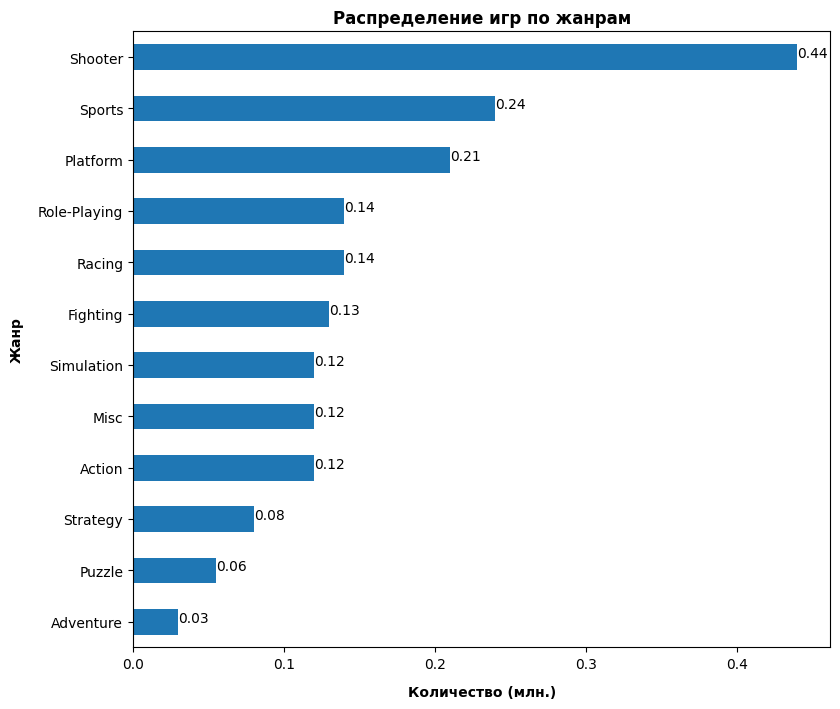

In [69]:
actual_data.groupby('genre')['total_sales'].median().sort_values().plot(kind='barh', figsize=(9, 8))
plt.title('Распределение игр по жанрам', fontweight='bold')
plt.ylabel('Жанр', fontweight='bold', labelpad=10)
plt.xlabel('Количество (млн.)', fontweight='bold', labelpad=10)

for index, value in enumerate(actual_data.groupby('genre')['total_sales'].median().sort_values()):
    plt.text(value, index, round(value, 2))

plt.show()

##### Вывод

Компьютерные игры начали выпускаться с 1980 года (9 шт) и до 1993 г. рост количества выпускаемых игр практически отсутствовал.
С 1993 года количество выпускаемых игр начинает расти и в 2002 наблюдается резкий скачок - более 800 выпускаемых игр в год.
Максимум выпущенных игр был в 2008 году и сооставил 1432 игры за год. В 2012 наблюдаем резкий спад до 653 игры по сравнению с 2011, в котором было выпущено 1138 игр. С 2012 по 2015 количество выпускаемых игр значительно не менялось. За 2016 год данные возможно неполные, поэтому количество игр чуть меньше по сравнению с периодом за 2012 по 2015 гг. Для нас важным является период 2012 - 2016.

Срок жизни платформы составляет 10 - 12 лет и период топ продаж игр для нее - 5 лет.

Перспективными платформами являются PS4 и XOne.

Присутствует слабая прямая связь отзывов критиков на продажи. Отзывы пользователей не сказываются на продажах.

К прибыльным жанрам можно отнести Shooter и Sport.


#### Портрет пользователя

Определим для пользователя каждого региона (NA, EU, JP), какие популярные платформы и жанры (топ - 5). А также определим влияние рейтинга ESRB на продажи.

##### Популярные платформы

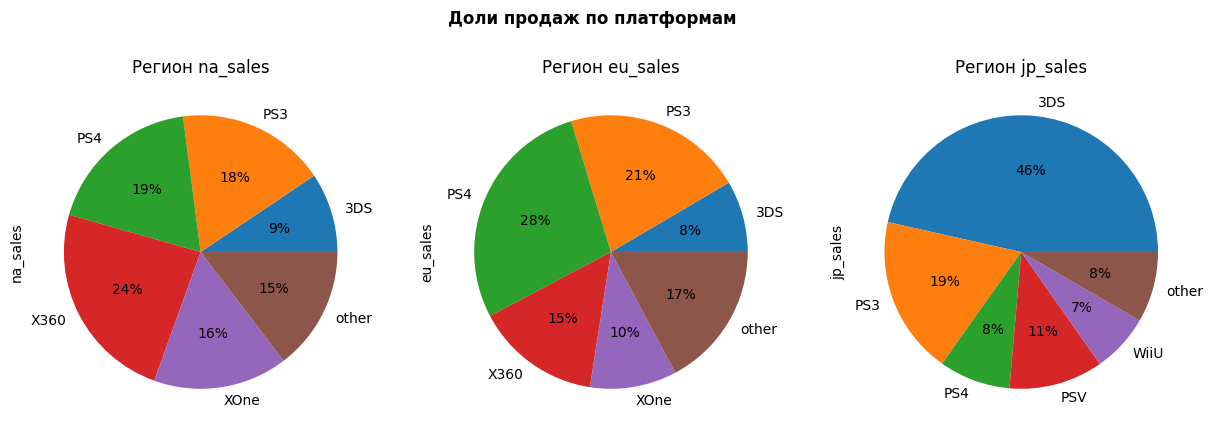

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Доли продаж по платформам', fontweight='bold')

# список с названиями регионов
filter_region = actual_data.columns[4:7]

for i in range(len(filter_region)):

    # Выделить топ-5, а продажи по остальным платформам объединить в отдельную категорию
    platform = actual_data.groupby('platform')[filter_region[i]].sum().sort_values(ascending=False).reset_index()
    platform.loc[5:, 'platform'] = 'other'
    platform = platform.groupby('platform')[filter_region[i]].sum()

    # Построение графика
    platform.plot(kind='pie', subplots=True, figsize=(4, 4), autopct='%1.0f%%', ax=ax[i])
    ax[i].set_title(f'Регион {filter_region[i]}')

plt.show()

##### Популярные жанры

In [71]:
na_genre = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().reset_index()
na_genre

,genre,na_sales
0,Action,177.05
1,Shooter,144.77
2,Sports,81.46
3,Role-Playing,60.65
4,Misc,38.13


In [72]:
eu_genre = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
eu_genre

,genre,eu_sales
0,Action,158.63
1,Shooter,113.47
2,Sports,69.05
3,Role-Playing,46.76
4,Racing,27.29


In [73]:
jp_genre = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().reset_index()
jp_genre

,genre,jp_sales
0,Role-Playing,61.93
1,Action,52.60
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


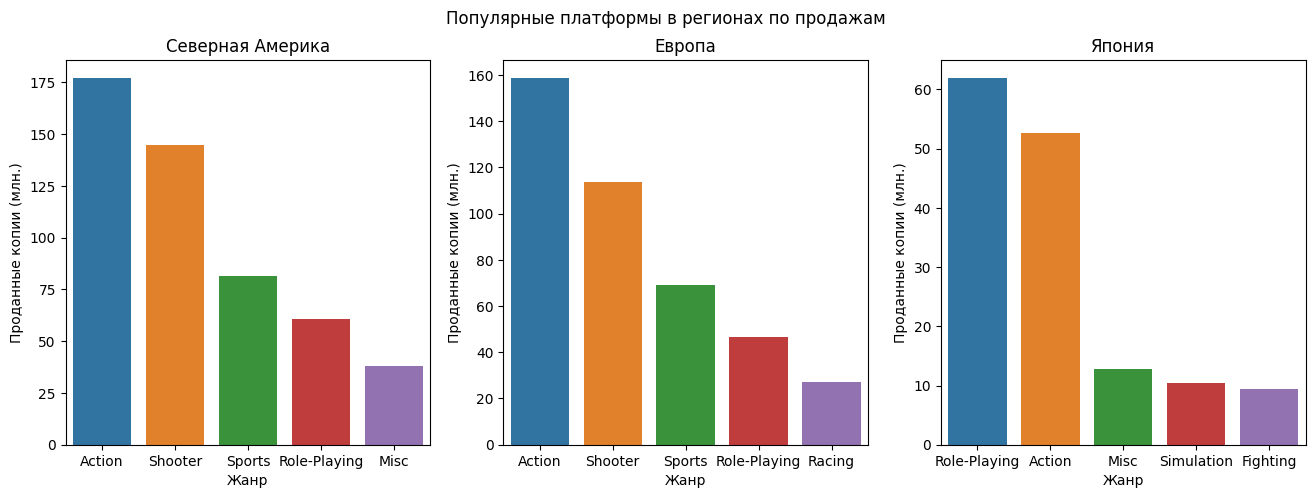

In [74]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Популярные платформы в регионах по продажам')

sns.barplot(y='na_sales', x='genre', data=na_genre, ax=ax[0])
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Проданные копии (млн.)')
ax[0].set_xlabel('Жанр')

sns.barplot(y='eu_sales', x='genre', data=eu_genre, ax=ax[1])
ax[1].set_title('Европа')
ax[1].set_ylabel('Проданные копии (млн.)')
ax[1].set_xlabel('Жанр')

sns.barplot(y='jp_sales', x='genre', data=jp_genre, ax=ax[2])
ax[2].set_title('Япония')
ax[2].set_ylabel('Проданные копии (млн.)')
ax[2].set_xlabel('Жанр')

plt.show()

##### Влияние рейтинга ESRB на продажи

In [75]:
na_rating = actual_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()
na_rating

rating
M          231.57
E          113.57
unknown    100.13
E10+        75.09
T           66.02
Name: na_sales, dtype: float64

In [76]:
eu_rating = actual_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()
eu_rating

rating
M          193.96
E          112.20
unknown     89.32
E10+        54.84
T           52.96
Name: eu_sales, dtype: float64

In [77]:
jp_rating = actual_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()
jp_rating

rating
unknown    105.49
E           27.96
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64

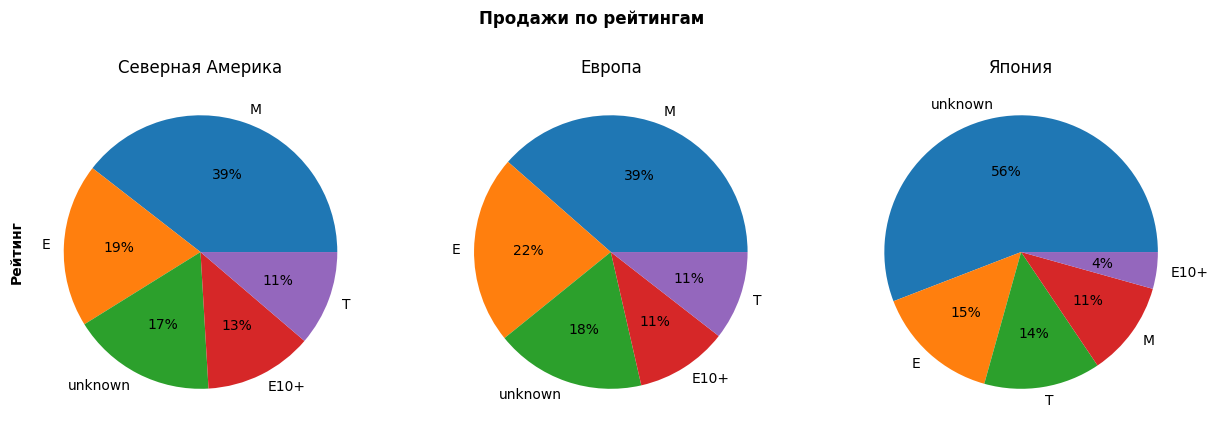

In [78]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по рейтингам', fontweight='bold')

na_rating.plot(kind='pie', subplots=True, figsize=(4, 4), autopct='%1.0f%%', ax=ax[0])
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Рейтинг', fontweight='bold')

eu_rating.plot(kind='pie', subplots=True, figsize=(4, 4), autopct='%1.0f%%', ax=ax[1])
ax[1].set_title('Европа')
ax[1].set_ylabel('')

jp_rating.plot(kind='pie', subplots=True, figsize=(4, 4), autopct='%1.0f%%', ax=ax[2])
ax[2].set_title('Япония')
ax[2].set_ylabel('')

plt.show()

##### Вывод

- Пользователи из Серверной Америки предпочитают платформы X360, PS4 и жанры игр Action и Shooter.
- Пользователи из Европы предпочитает платформы PS4, PS3 и также жанры игр Action и Shooter.
- Пользователи из Японии предпочитают платформы 3DS, PS3 и жанры Role-Playing и Action.

Можно отметить схожесть пользователей Северной Америки и Европы. В том числе и по выручке в разрезе рейтинга игр.

#### Проверка гипотез

Проверим гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

$H_0$: Средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтинга платформы PC.

$H_1$: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [79]:
xbox_user_score = actual_data.query('platform == "XOne"')['user_score']
pc_user_score = actual_data.query('platform == "PC"')['user_score']

alpha = .05

results = st.ttest_ind(xbox_user_score, pc_user_score, nan_policy='omit')

display(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-value: 0.5535084896214284'

'Не получилось отвергнуть нулевую гипотезу'

##### Cредние пользовательские рейтинги жанров Action и Sports  разные

$H_0$: Средние пользовательские рейтинги жанра Action равны средним пользовательским рейтинга жанра Sports.

$H_1$: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [80]:
action_user_score = actual_data.query('genre == "Action"')['user_score']
sports_user_score = actual_data.query('genre == "Sports"')['user_score']

alpha = .05

results = st.ttest_ind(action_user_score, sports_user_score, nan_policy='omit')

display(f'p=value: {results.pvalue}')

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p=value: 4.3728333809212976e-26'

'Отвергаем нулевую гипотезу'

##### Вывод

Можно предположить, что пользовательские рейтинги платформ Xbox One и PC одинаковые.

Есть вероятность, что средние пользовательские рейтинги жанров Acrion и Sports разные.

#### Вывод

**Загрузка данных**

Загрузили данные о продажах виодеоигр `data`. 

- Количество строк в загруженных данных - 16 715.
- Необходимо привести названия столбцов к нижнему регистру.
- Присутствуют пропуски данных в количестве:
    - `Name` (название игры) - 2;
    - `Year_of_Release` (год выпуска) - 269;
    - `Genre` (жанр игры) - 2;
    - `Critic_Score ` (оценка критиков) - 8578;
    - `User_Score` (оценка пользователей) - 6701;
    - `Rating` (рейтинг от организации ESRB) - 6766.

Типы данных не соответствующие хранящимся в них значениям:
- `Year_of_Release` - хранит год выпуска. Необходимо поменять `float64` на `int32`.
- `User_Score ` - хранит оценку пользователей. Необходимо поменять `object` на `float32`.

**Предобработка данных**

Переименованили столбцы:
- Названия столбцов приведены к ниженему регистру.

Заполнили пропущенные значения:
- Устранили пропуски данных в названии игр, удалив две строки с играми 1993 года выпуска.
- Исключили 269 строк с пропусками в годах выпуска.
- Пропуски в оценке критков составляют 51,38% и пропуски есть за разные периоды. Оставили пропущенные значения, так как пропущенно очень большое количество значений и за разные периоды, а также необязательно, что игра получившая хорошие оценки на одной из платформ, получит их на другой из за особенностей как самой платформы, так и адаптации.
- Пропуски в оценке пользователей составляют 40,11% и пропуски есть за разные периоды на разных платформах. Оставили пропущенные значения.
- Пропуске в рейтинге составляют 40,56%. Пропуски выделили в отдельную группу, присвоив им значение 'unknown'.

Преобразовали типы данных:
- Преобразовали тип данных в year_of_release (год выпуска) на int32.
- Преобразовали тип данных в user_score (оценка пользователей) на float32. При этом 2379 строк содержали не числовое значение 'tbd', что означает 'подлежит уточнению'. Изменили значение на NaN и после этого преобразовали тип данных.

Обработка дубликатов:
- Удалили 1 строку с неявными дубликатами по названию, платформе и году релиза одновременно.

Подсчетали суммарные продажи игр во всех регионах и записали значения в `total_sales`.

**Исследовательский анализ данных**

Компьютерные игры начали выпускаться с 1980 года (9 шт) и до 1993 г. рост количества выпускаемых игр практически отсутствовал.
С 1993 года количество выпускаемых игр начинает расти и в 2002 наблюдается резкий скачок - более 800 выпускаемых игр в год.
Максимум выпущенных игр был в 2008 году и сооставил 1432 игры за год. В 2012 наблюдаем резкий спад до 653 игры по сравнению с 2011, в котором было выпущено 1138 игр. С 2012 по 2015 количество выпускаемых игр значительно не менялось. За 2016 год данные возможно неполные, поэтому количество игр чуть меньше по сравнению с периодом за 2012 по 2015 гг. Для нас важным является период 2012 - 2016.

Срок жизни платформы составляет 10 - 12 лет и период топ продаж игр для нее - 5 лет.

Перспективными платформами являются PS4 и XOne.

Присутствует слабая прямая связь отзывов критиков на продажи. Отзывы пользователей не сказываются на продажах.

К прибыльным жанрам можно отнести Shooter и Sport.

**Портрет пользователя**

- Пользователи из Серверной Америки предпочитают платформы X360, PS4 и жанры игр Action и Shooter.
- Пользователи из Европы предпочитает платформы PS4, PS3 и также жанры игр Action и Shooter.
- Пользователи из Японии предпочитают платформы 3DS, PS3 и жанры Role-Playing и Action.

Можно отметить схожесть пользователей Северной Америки и Европы. В том числе и по выручке в разрезе рейтинга игр.

**Проверка гипотез**

Можно предположить, что пользовательские рейтинги платформ Xbox One и PC одинаковые.

Есть вероятность, что средние пользовательские рейтинги жанров Acrion и Sports разные.


**Рекомендации для отдела маркетинга:**

*Для североамериканского и европейского рынков:*

Следует обратить внимание на платформы PS4, XOne и на жанры Shooter и Sport. Возможно стоит принять во внимание оценки критиков. А также учесть, что большая доля проданных игр - это игры рейтинга 'M' от организации ESRB.

*Для японского рынка:*

Следует обратить внимание на мобильные платформы и жанры игр Role-Playing и Action.